In [352]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
DATASET_SIZE = 78

RESULTS_FILES = [
    # 'svm_results__split_0.5/trials.csv',
    'svm_results__split_0.6/trials.csv'
]

COLORS = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

In [437]:
def get_train_test_sample_sizes(result_file):
    train_ratio = float(result_file.split("_")[-1].split("/")[0])
    n_train = np.ceil(DATASET_SIZE * train_ratio)
    n_test = DATASET_SIZE - n_train
    return n_train, n_test
    
    
def visualize_results(result_file):
    n_train, n_test = get_train_test_sample_sizes(result_file)
        
    df = pd.read_csv(result_file)
    
    feature_names = set(list(df['feature_name']))
    pooling_mechanisms = set(list(df['pooling_mechanism']))
    regularization_values = set(list(df['C']))
    algorithms = set(list(df['algorithm']))
    groups = df.groupby(["feature_name", "C", "pooling_mechanism", "algorithm"]).aggregate(["mean", "std"])
    
    
    
    for algorithm in sorted(algorithms):
        
        labels = []
        mean_train_acc = []
        mean_test_acc = []
        stm_train_acc = []
        stm_test_acc = []
        
        
        for feature_name in sorted(feature_names):
            for pooling_mechanism in sorted(pooling_mechanisms):
                for regularization_value in sorted(regularization_values):
                    label = (feature_name, regularization_value, pooling_mechanism, algorithm)
                    
                    labels.append(label)
                    
                    mean_train_acc.append(
                        groups['train_acc']['mean'][label]
                    )
                    
                    mean_test_acc.append(
                        groups['test_acc']['mean'][label]
                    )
                    
                    stm_train_acc.append(
                        groups['train_acc']['std'][label] / np.sqrt(n_train)
                    )
                    
                    stm_test_acc.append(
                        groups['test_acc']['std'][label] / np.sqrt(n_test)
                    )
        
        fig, ax = plt.subplots(figsize=(15, 30))
        #plt.bar(labels, mean_train_acc)
        #print(labels)
        bar_width = 5
        bar_margin = 5

        train_y_pos = (bar_width+bar_margin)*np.arange(len(labels))
        test_y_pos =(bar_width+bar_margin)*np.arange(len(labels)) +1

        ax.barh(train_y_pos, mean_train_acc, height=5, xerr=stm_train_acc, color=COLORS[7])
        ax.barh(test_y_pos, mean_test_acc, height=5, xerr=stm_test_acc, color="#4682b4") # color=COLORS[2]
        
        for i, label in enumerate(labels):
            
            (feature_name, C, pooling_mechanism, algorithm) = label
            
            f_name = feature_name.replace(
                "retrained-wav2vec_features-z", "OUR  Latent"
            ).replace(
                "retrained-wav2vec_features-c", "OUR  Context"
            ).replace(
                "wav2vec_features-z", "BSLN  Latent"
            ).replace(
                "wav2vec_features-c", "BSLN  Context"
            )
            
            f_pool = pooling_mechanism.replace("neuron_", "")
            label_str = f"{f_name}-{f_pool}  R-{C}"
            
            train_acc_label_str = f"{mean_train_acc[i]:.02%}"
            test_acc_label_str = f"{mean_test_acc[i]:.02%}"
            
            ax.text(0.01, train_y_pos[i], label_str, color='white', fontsize="x-large", fontweight="bold")
            
            ax.text(mean_train_acc[i]-0.07, train_y_pos[i]-0.7, train_acc_label_str, color='white', fontsize="large")
            ax.text(mean_test_acc[i]-0.07, train_y_pos[i], test_acc_label_str, color='white', fontsize="large")

        ax.set_yticks([])
        #ax.set_yticks(train_y_pos)
        #ax.set_yticklabels(labels)
        ax.grid(True)
        str_algo = algorithm.upper()
        ax.set_title(f"Classification Accuracy of Susu vs Maninka vs Pular using {str_algo} on Wav2Vec features")
        ax.legend(["TRAIN Accuracy", "TEST Accuracy"])
                    
                    

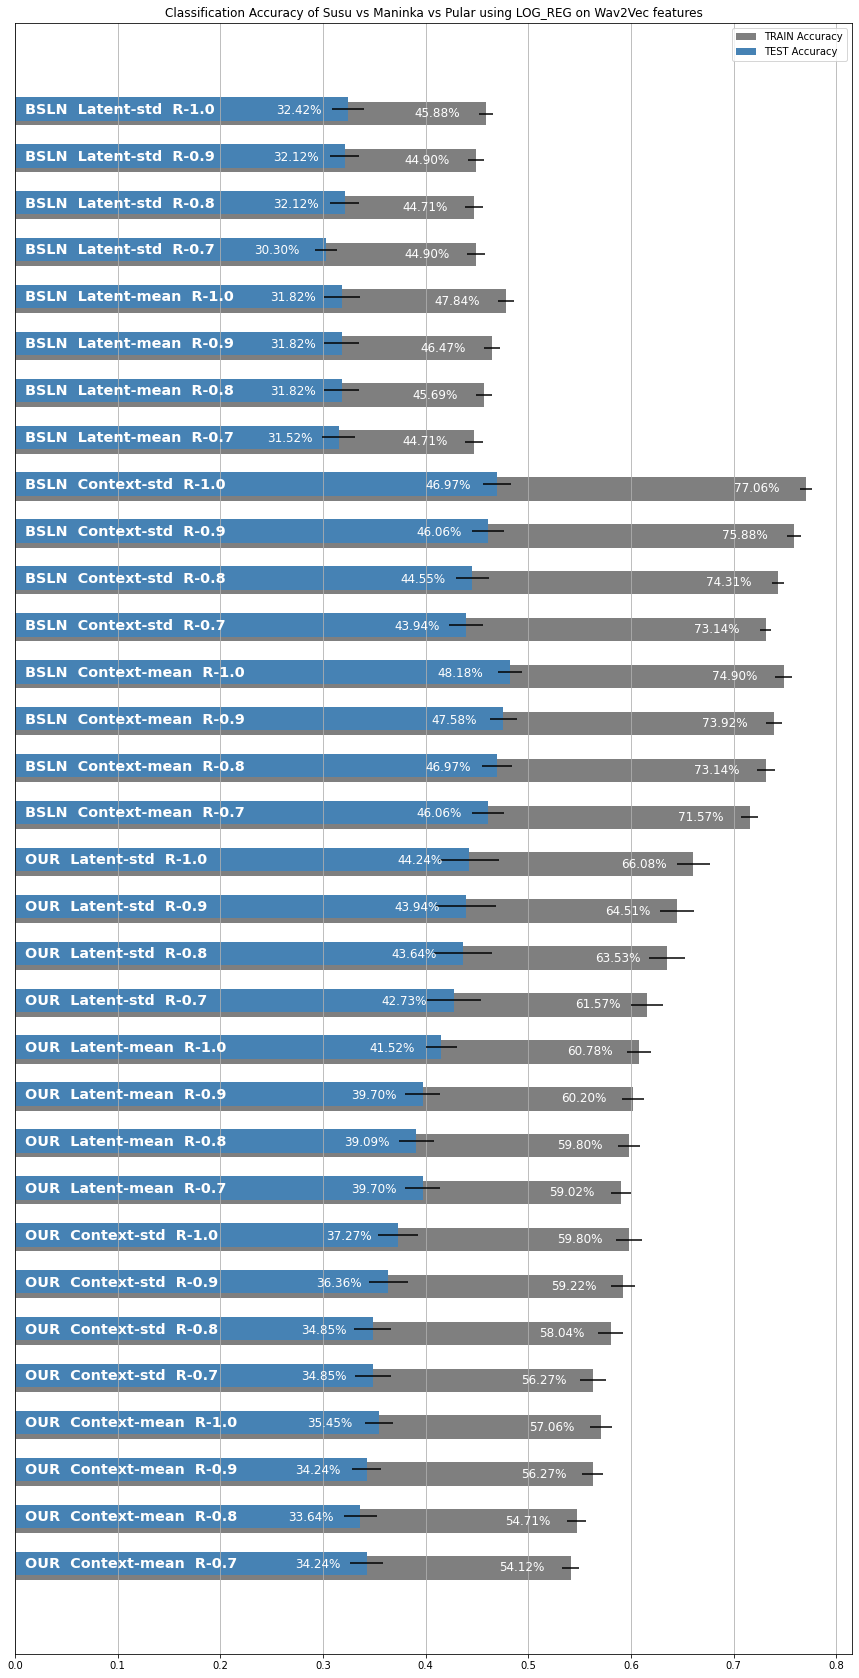

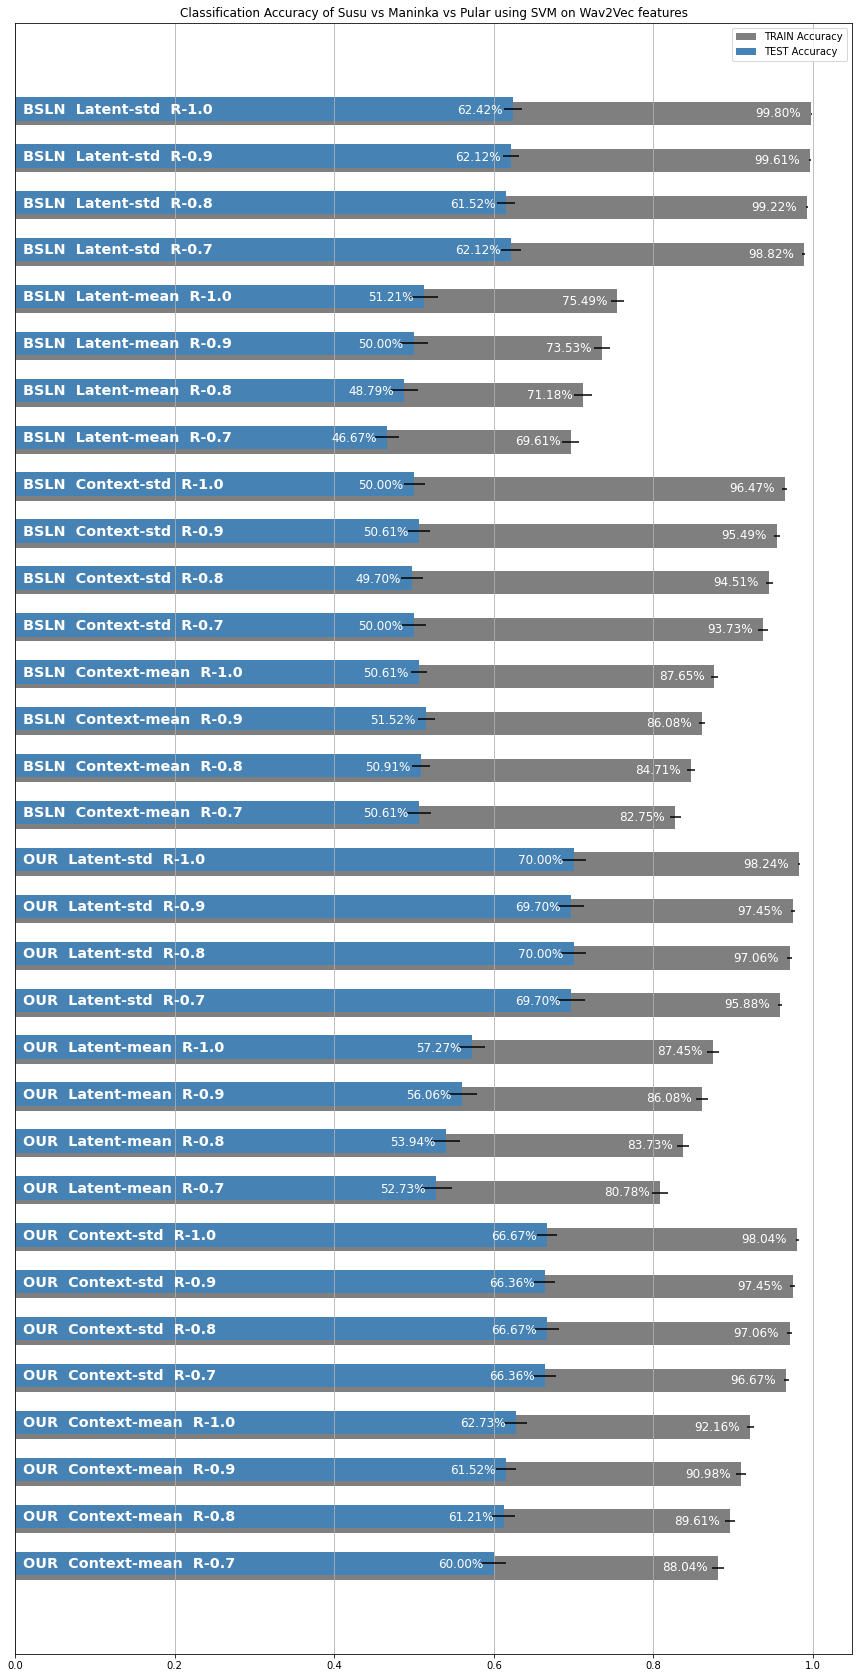

In [438]:
for result_file in RESULTS_FILES:
    visualize_results(result_file)